<center>
<h3>States and Memory demonstrations</h3>
</center>

# State Schema 
<ul>
<li>When creating Graph we define StateGraph and we use State</li>
<li>The State Schema represents the structure and type of data that our graph will use</li>
<li>All Nodes are expected to communicate with that schema</li>
</ul>
There are various ways we can define the type / structure of our schema.
<ul>
<li>TypeDict  (Not inforced at runtime)</li>
<li>DataClass (Not inforced at runtime)</li>
<li>Pydantic <code>(Enforced at runtime)</code></li>
</ul>
Use <code>Pydentic</code> to define states of graph as it is being implemeted at the runtime so that any unvalidated data won't go into the system.
Other than TypeDict or DataClass these are not being implemented at the run time.

In [6]:
from langchain_core.pydantic_v1 import BaseModel,validator,ValidationError
from typing import Literal

class PydanticState(BaseModel):
    name: str
    mood: Literal["happy","sad"]
    
    @validator('mood')
    def validate_mood(cls,value):
        if value in ["happy","sad"]:
            return value
        raise ValidationError("Mood should be in ['happy','sad'] ")
    
try:
    state = PydanticState(name="aditya",mood="mad")
except Exception as e:
    print(e)

1 validation error for PydanticState
mood
  unexpected value; permitted: 'happy', 'sad' (type=value_error.const; given=mad; permitted=('happy', 'sad'))


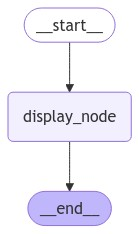

In [11]:
from langgraph.graph import START,END,StateGraph
from IPython.display import Image,display

def display_mood(state:PydanticState):
    return {'name':state.name,'mood':state.mood}

builder = StateGraph(PydanticState)
builder.add_node('display_node',display_mood)

builder.add_edge(START,'display_node')
builder.add_edge('display_node',END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({'name':'Aditya','mood':'happy'})

{'name': 'Aditya', 'mood': 'happy'}

In [15]:
# Will throw error at execution time
graph.invoke({'name':'Aditya','mood':'good'})

ValidationError: 1 validation error for PydanticState
mood
  unexpected value; permitted: 'happy', 'sad' (type=value_error.const; given=good; permitted=('happy', 'sad'))